In [2]:
"""필요 라이브러리들 호출"""

import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns # 시각화를 위한 라이브러리
import matplotlib.pyplot as plt
import calendar
from datetime import datetime

import os
print(os.listdir("/users/eunnyoung/work/kaggle/bike_sharing_demand/data"))

['sampleSubmission.csv', 'test.csv', 'train.csv']


## 1. 훈련, 테스트 데이터셋의 형태 및 컬럼의 속성 데이터 값 파악

In [3]:
# 훈련데이터와 테스트 데이터셋 불러오기
train = pd.read_csv('/users/eunnyoung/work/kaggle/bike_sharing_demand/data/train.csv')
test = pd.read_csv('/users/eunnyoung/work/kaggle/bike_sharing_demand/data/test.csv')

In [4]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [5]:
# 데이터셋 내에 있는 컬럼 속성들에 대한 설명

"""
datetime - hourly date + timestamp
season - 1 = spring, 2 = summer, 3 = fall, 4 = winter
holiday - whether the day is considered a holiday
workingday - whether the day is neither a weekend nor holiday
weather - 1: Clear, Few clouds, Partly cloudy
          2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
          3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
          4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
temp - temperature in Celsius
atemp - "feels like" temperature in Celsius
humidity - relative humidity
windspeed - wind speed
casual - number of non-registered user rentals initiated
registered - number of registered user rentals initiated
count - number of total rentals
"""

# 훈련 데이터셋의 각 컬럼별 데이터 타입 및 값의 개수 파악
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
datetime      10886 non-null object
season        10886 non-null int64
holiday       10886 non-null int64
workingday    10886 non-null int64
weather       10886 non-null int64
temp          10886 non-null float64
atemp         10886 non-null float64
humidity      10886 non-null int64
windspeed     10886 non-null float64
casual        10886 non-null int64
registered    10886 non-null int64
count         10886 non-null int64
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [6]:
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


## 2. 데이터 전처리 및 시각화

In [7]:
# datetime 속성을 분리하여 추출 속성으로 활용하기 위해 split 함수 사용

train['tempDate'] = train.datetime.apply(lambda x:x.split())

In [10]:
# 분리한 tempDate를 가지고 년-월-일을 이용하여 year, month, day 그리고 weekday column을 추출
# split() [문자형 자료형_ 문자열 나누기] <=> join() [문자형 자료형_ 문자열 삽입]

train['year'] = train.tempDate.apply(lambda x:x[0].split('-')[0])
train['month'] = train.tempDate.apply(lambda x:x[0].split('-')[1])
train['day'] = train.tempDate.apply(lambda x:x[0].split('-')[2])

# weekday는 calendar패키지와 datetime패키지를 활용한다.
# calendar.day_name 사용법: https://stackoverflow.com/questions/36341484/get-day-name-from-weekday-int
# datetime.strptime 문서: https://docs.python.org/3/library/datetime.html#strftime-strptime-behavior
# 파이썬에서 날짜와 시간 다루기: https://datascienceschool.net/view-notebook/465066ac92ef4da3b0aba32f76d9750a/ 

train['weekday'] = train.tempDate.apply(lambda x:calendar.day_name[datetime.strptime(x[0], "%Y-%m-%d").weekday()])

train['hour'] = train.tempDate.apply(lambda x:x[1].split(':')[0])

In [12]:
# 분리를 통해 추출된 속성은 문자열 속성을 가지고 있으므로 숫자형 데이터로 변환
# pandas.to_numeric(): https://pandas.pydata.org/pandas-docs/stable/generated/pandas.to_numeric.html

train['year'] = pd.to_numeric(train.year,errors='coerce')
train['month'] = pd.to_numeric(train.month,errors='coerce')
train['day'] = pd.to_numeric(train.day,errors='coerce')
train['hour'] = pd.to_numeric(train.hour, errors='coerce')

In [13]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 18 columns):
datetime      10886 non-null object
season        10886 non-null int64
holiday       10886 non-null int64
workingday    10886 non-null int64
weather       10886 non-null int64
temp          10886 non-null float64
atemp         10886 non-null float64
humidity      10886 non-null int64
windspeed     10886 non-null float64
casual        10886 non-null int64
registered    10886 non-null int64
count         10886 non-null int64
tempDate      10886 non-null object
year          10886 non-null int64
month         10886 non-null int64
day           10886 non-null int64
weekday       10886 non-null object
hour          10886 non-null int64
dtypes: float64(3), int64(12), object(3)
memory usage: 1.5+ MB


In [14]:
# 필요를 다한 tempDate column을 drop함
train = train.drop('tempDate', axis=1)

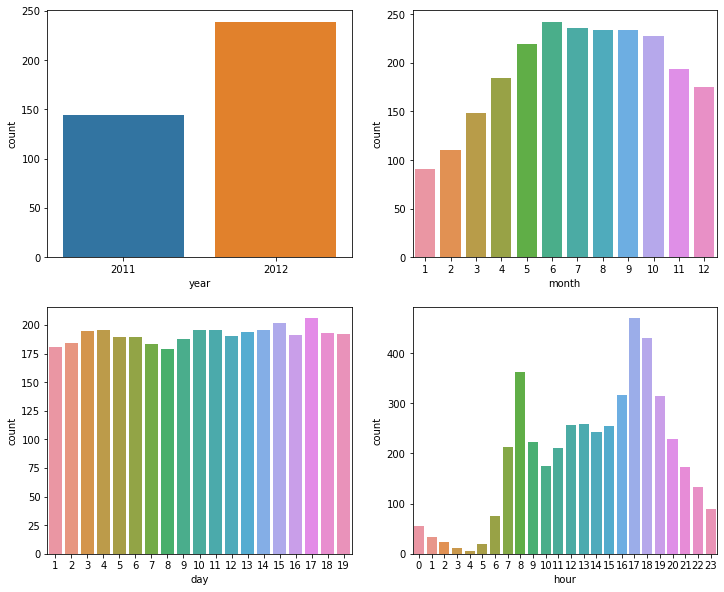

In [15]:
# 각각의 속성과 예측의 결과값으로 쓰이는 count값과의 관계 파악

# 년도와 count
fig = plt.figure(figsize=[12,10])
ax1 = fig.add_subplot(2,2,1)
ax1 = sns.barplot(x='year', y='count', data=train.groupby('year')['count'].mean().reset_index())

# month와 count
ax2 = fig.add_subplot(2,2,2)
ax2 = sns.barplot(x='month', y='count', data=train.groupby('month')['count'].mean().reset_index())

# day와 count
ax3 = fig.add_subplot(2,2,3)
ax3 = sns.barplot(x='day', y='count', data=train.groupby('day')['count'].mean().reset_index())

# hour와 count
ax4 = fig.add_subplot(2,2,4)
ax4 = sns.barplot(x='hour', y='count', data=train.groupby('hour')['count'].mean().reset_index())

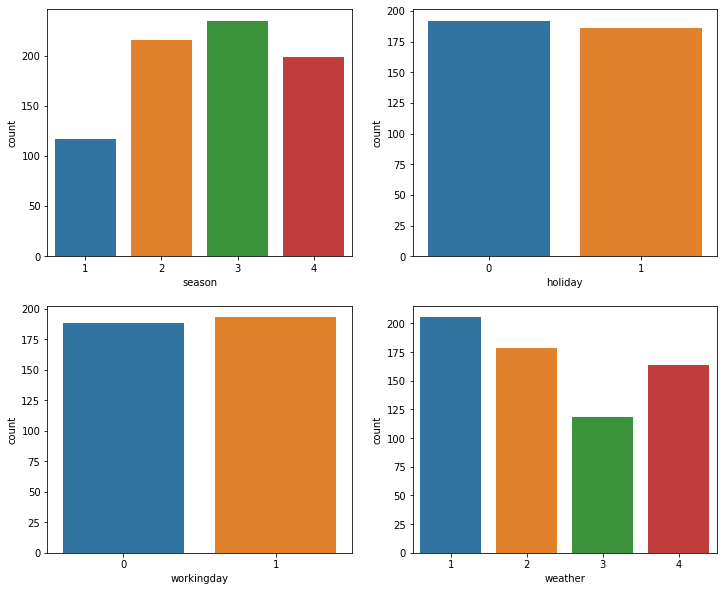

In [17]:
# 계절과 count
fig = plt.figure(figsize=[12,10])
ax1 = fig.add_subplot(2,2,1)
ax1 = sns.barplot(x='season', y='count', data=train.groupby('season')['count'].mean().reset_index())

# 휴일 여부와 count
ax2 = fig.add_subplot(2,2,2)
ax2 = sns.barplot(x='holiday', y='count', data=train.groupby('holiday')['count'].mean().reset_index())

# 작업일 여부와 count
ax3 = fig.add_subplot(2,2,3)
ax3 = sns.barplot(x='workingday', y='count', data=train.groupby('workingday')['count'].mean().reset_index())

# 날씨와 count
ax4 = fig.add_subplot(2,2,4)
ax4 = sns.barplot(x='weather', y='count', data=train.groupby('weather')['count'].mean().reset_index())